In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Not detected")

CUDA available: True
GPU device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
pip install fastai

  Using cached fastai-2.8.2-py3-none-any.whl.metadata (9.5 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.8.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached fasttransform-0.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached plum_dispatch-2.5.7-py3-none-any.whl.metadata (7.5 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpathlib-0.21.1-py3-none-any.whl.metadat

In [6]:
from fastai.vision.all import *
import numpy as np
import pandas as pd
import os

In [12]:
from pathlib import Path
path = Path("D:\College\Year3 Term4\Deep Learning Applications\Assignment\CA4\Dataset\chest_xray")
path.ls()

(#5) [Path('D:/College/Year3 Term4/Deep Learning Applications/Assignment/CA4/Dataset/chest_xray/chest_xray'),Path('D:/College/Year3 Term4/Deep Learning Applications/Assignment/CA4/Dataset/chest_xray/test'),Path('D:/College/Year3 Term4/Deep Learning Applications/Assignment/CA4/Dataset/chest_xray/train'),Path('D:/College/Year3 Term4/Deep Learning Applications/Assignment/CA4/Dataset/chest_xray/val'),Path('D:/College/Year3 Term4/Deep Learning Applications/Assignment/CA4/Dataset/chest_xray/__MACOSX')]

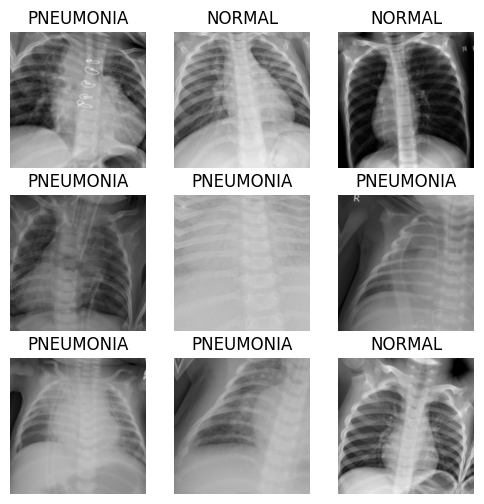

In [14]:
dls = ImageDataLoaders.from_folder(
    path/'train',
    valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    seed=42
)

dls.show_batch(max_n=9, figsize=(6,6))

In [15]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

D:\anaconda3\envs\torch-gpu\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.528530,0.329620,0.903164,01:30


epoch,train_loss,valid_loss,accuracy,time
0,0.246728,0.160295,0.960690,01:29
1,0.185738,0.146613,0.957814,01:29
2,0.130674,0.107357,0.961649,01:28
3,0.124050,0.097096,0.964525,01:29


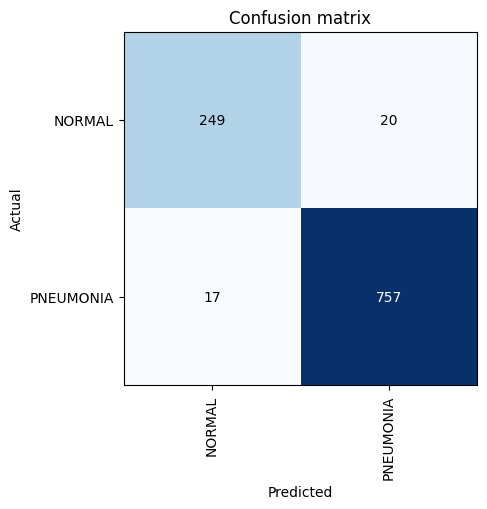

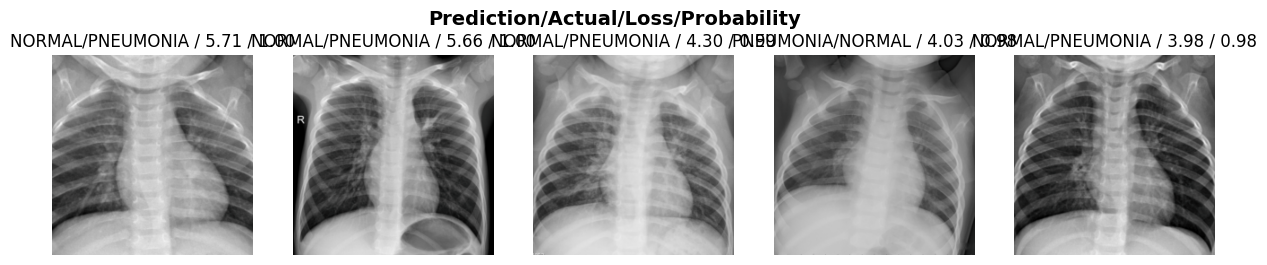

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))
interp.plot_top_losses(5, nrows=1)

Prediction: NORMAL


<Axes: >

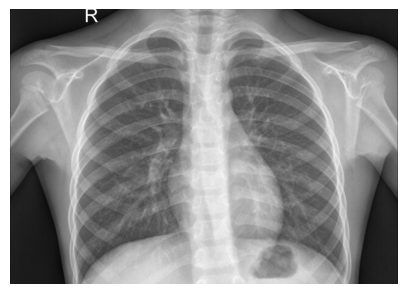

In [20]:
img = PILImage.create(r"D:\College\Year3 Term4\Deep Learning Applications\Assignment\CA4\Dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg")
pred_class, pred_idx, outputs = learn.predict(img)
print(f"Prediction: {pred_class}")
img.show()